## Uso do arquivo python SpotifyAPI.py 

O arquivo `SpotifyAPI.py` contém uma classe `SpotifyAPI` que oferece métodos para interagir com a API do Spotify. Isso inclui autenticar o aplicativo, obter o token de acesso, obter informações de músicas, artistas e outros. Ao utilizar esta classe, você pode facilmente acessar e manipular dados do Spotify em seus projetos, permitindo análises profundas e personalizadas de sua atividade musical.

## Autenticação e Geração do Código

Após criar o aplicativo no Spotify Developer Dashboard, é necessário autenticar o aplicativo para que ele possa interagir com a API do Spotify. A autenticação é feita por meio do protocolo OAuth 2.0, que requer que o usuário faça login e autorize o aplicativo a acessar certas informações.

Aqui está como você pode gerar o código de autenticação:

### Configurar as Credenciais do Aplicativo

Primeiro, você precisará fornecer as credenciais do aplicativo, incluindo `client_id`, `client_secret` e `redirect_uri`, conforme definido durante a criação do aplicativo.

### Construir URL de Autorização

Em seguida, você precisará construir a URL de autorização. Isso é feito usando a função `build_authorization_url()`.

In [2]:
from src.SpotifyAPI import *

#Obter as credenciais no arquivo
with open('SuasCredenciais.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        key, value = line.strip().split(': ')
        if key == 'CLIENT_ID':
            client_id = value
        elif key == 'CLIENT_SECRET':
            client_secret = value
        elif key == 'REDIRECT_URI':
            redirect_uri = value


spotify_api = SpotifyAPI(client_id, client_secret, redirect_uri)

authorization_url = spotify_api.build_authorization_url()
print(authorization_url)


https://accounts.spotify.com/authorize?client_id=%7Binsira+aqui%7D&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A4202&scope=



### Clique no Link e Autorize o Aplicativo

Após executar o código acima, um link será impresso no console. Clique no link para ser redirecionado para a página de login do Spotify.

1. **Faça Login**: Insira suas credenciais de login do Spotify.
2. **Autorize o Aplicativo**: Você verá uma tela mostrando as permissões que o aplicativo está solicitando. Clique em "Aceitar" para autorizar o aplicativo.

    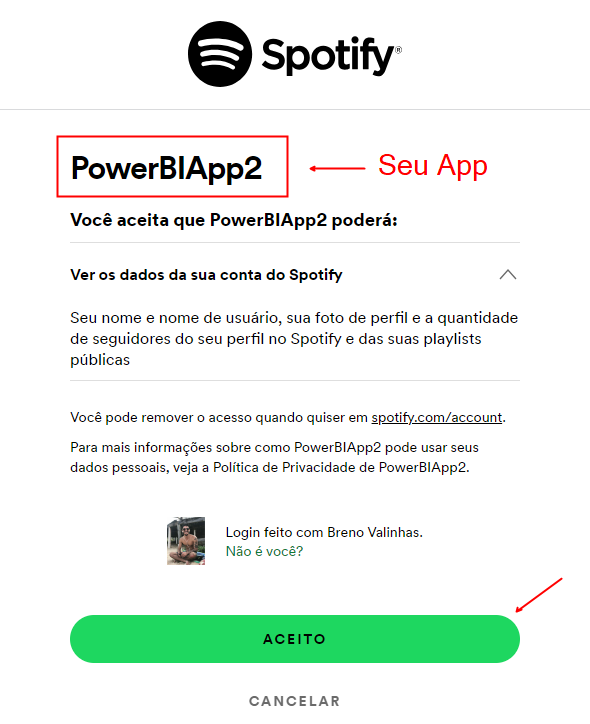


3. **Copie o Código**: Após autorizar o aplicativo, você será redirecionado para a URL de redirecionamento definida anteriormente. Na URL, você encontrará um parâmetro chamado `code`. Copie esse código.

    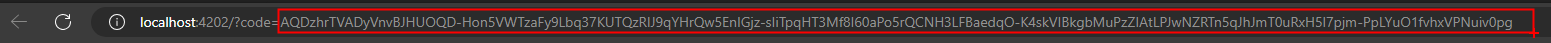
Este código é usado para obter o token de acesso, que permite que seu aplicativo faça solicitações à API em nome do usuário.

Com esse código em mãos, você está pronto para avançar para a próxima etapa, onde usará esse código para obter um token de acesso. Isso permitirá que seu aplicativo faça solicitações à API do Spotify e recupere informações do usuário, playlists, músicas e muito mais.

---


## Obtendo o Token de Acesso

Uma vez que você tenha o código de autorização, a próxima etapa é usá-lo para obter um token de acesso. O token de acesso é o que permite que o aplicativo faça chamadas à API do Spotify em nome do usuário.

Aqui estão os passos para obter o token de acesso:

### Substitua o Código de Autorização

Primeiro, você precisará substituir `{your_authorization_code}` pelo código de autorização real que você copiou na etapa anterior.

### Obtenha o Token de Acesso

Em seguida, você usará o método `get_access_token()` para obter o token de acesso usando o código de autorização.

O token de acesso impresso é uma string alfanumérica, e é usado em todas as chamadas subsequentes à API do Spotify para autenticar o aplicativo.

### Considerações

O token de acesso tem um tempo limitado de validade, geralmente 1 hora. Após esse período, você precisará renovar o token usando um token de atualização (se tiver solicitado o escopo adequado durante a autorização).

In [23]:
# Replace {your_authorization_code} with your actual authorization code
authorization_code = "AQCJUr6k3l_YTFq9VLkuKGsskEHK2BvWq_b9lC3QMpH_NOk3Xy6dEehkyj9a6LnEnTwT85YJGt1Mgf-VHe6EuPJNoIV0uCwdN-QDz_zxkJwmCsPqAuv5AtGXfsYtbAy-ou24zzXKD3cu_qu64QXC7GpFb9z-hz5bGA"
access_token = spotify_api.get_access_token(authorization_code)
print(access_token)

BQAwa8vtYruyhRS5rHcrVsxZ38pFbUnLsVm8LA5j6FmeMPMt02ZJElTKF4on8LHx1uY81vDLY0d_iLl5Q88gT4bWIcsnVZGwOy2ynjXUQA-oJAZVwW-oCWv56-Rx-km7kV7OWnOwrea3_n-QBiWciZyyzuSYB-Qg3lNP-ZKvI4x9RmwMSko


---

Com o token de acesso em mãos, você pode começar a fazer solicitações à API do Spotify para buscar informações sobre o histórico de streaming, músicas, álbuns, artistas e muito mais. Na próxima etapa, exploraremos como você pode buscar o histórico de streaming estendido usando esse token de acesso. 

## Juntando o Histórico Ampliado (JSON)

O histórico estendido de streaming do Spotify é geralmente armazenado em arquivos JSON separados, especialmente se você estiver exportando dados de várias contas ou períodos diferentes. A etapa a seguir explica como consolidar esses arquivos JSON em um único DataFrame para análise posterior.

Este processo consolida com sucesso todos os arquivos JSON do histórico estendido em um único DataFrame, tornando-o pronto para análises adicionais, como buscar informações e imagens de músicas, álbuns e artistas.

In [6]:
import os
import json
import pandas as pd

# Define relative paths
PATH_EXTENDED_HISTORY = 'Spotify Data/raw/StreamingHistory_Extended/'
PATH_OUT = 'Spotify Data/Processed/' 

# Get a list of all JSON files in the directory
json_files = [pos_json for pos_json in os.listdir(PATH_EXTENDED_HISTORY ) if pos_json.endswith('.json')]

# Initialize an empty list to hold DataFrames
dfs = []

# Load the data from each JSON file and append it to the DataFrame list
for index, js in enumerate(json_files):
    with open(os.path.join(PATH_EXTENDED_HISTORY , js)) as json_file:
        json_text = json.load(json_file)
        temp_df = pd.json_normalize(json_text)
        dfs.append(temp_df)

# Concatenate all the DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)


# Cast object columns containing only 'True' and 'False' strings to bool dtype
for col in df.columns:
    if df[col].dtype == 'object' and all(df[col].dropna().apply(lambda x: x in [True, False, 'True', 'False'])):
        df[col] = df[col].astype(bool)

display(df.head(5))

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2014-09-29T17:53:45Z,11158297133,Windows 8 (6.2.9200; x64),8135,IE,193.120.235.122,unknown,I Am the Man,Freshlyground,Nomvula,...,None,None,None,clickrow,clickrow,False,True,False,0.0,False
1,2014-09-29T17:59:02Z,11158297133,Windows 8 (6.2.9200; x64),317106,IE,193.120.235.122,unknown,Vanish,Freshlyground,Nomvula,...,None,None,None,clickrow,trackdone,False,False,False,0.0,False
2,2014-09-29T18:54:09Z,11158297133,Windows 8 (6.2.9200; x64),28932,IE,193.120.235.122,unknown,Zithande,Freshlyground,Nomvula,...,None,None,None,trackdone,endplay,False,True,False,0.0,False
3,2014-10-07T00:46:31Z,11158297133,Windows 8 (6.2.9200; x64),324000,IE,193.120.235.122,unknown,My Little Brown Book,Duke Ellington,Duke Ellington & John Coltrane,...,None,None,None,clickrow,trackdone,False,False,False,0.0,False
4,2014-10-07T00:52:22Z,11158297133,Windows 8 (6.2.9200; x64),350426,IE,193.120.235.122,unknown,Circle,Miles Davis,The Complete Columbia Studio Recordings Of The...,...,None,None,None,trackdone,trackdone,False,False,False,0.0,False


## Obtendo Valores Distintos de IDs

Os dados consolidados do histórico estendido do Spotify podem conter várias entradas para a mesma faixa ou episódio, dependendo de quantas vezes foram reproduzidos. Para evitar duplicatas ao buscar informações adicionais, como detalhes de músicas, álbuns e artistas, é necessário extrair os valores distintos de IDs.

Esse processo prepara os dados para a próxima etapa, que é usar a API do Spotify para buscar informações e imagens de músicas, álbuns e artistas.

In [35]:
# Extract distinct artistName and trackName
distinct_df = df[['spotify_track_uri', 'spotify_episode_uri']].drop_duplicates()

# Create a new column that takes the non-null value from either spotify_track_uri or spotify_episode_uri
distinct_df['spotify_uri'] = distinct_df.apply(lambda row: row['spotify_track_uri'] if pd.notnull(row['spotify_track_uri']) else row['spotify_episode_uri'], axis=1).drop_duplicates()

# Optionally, you can drop the original columns
distinct_df.drop(['spotify_track_uri', 'spotify_episode_uri'], axis=1, inplace=True)

# Split the spotify_uri into parts using the colon character
distinct_df[['prefix', 'type', 'id']] = distinct_df['spotify_uri'].str.split(':', expand=True)

# Optionally, you can drop the 'prefix' column as it's not needed
distinct_df.drop(['prefix'], axis=1, inplace=True)

# Reset the index of the DataFrame
distinct_df = distinct_df.reset_index(drop=True)

display(distinct_df)

,spotify_uri,type,id
0,spotify:track:019m7qUQerzKMWNlS7sO2o,track,019m7qUQerzKMWNlS7sO2o
1,spotify:track:5ruzfgWfhgusrn772s9dC5,track,5ruzfgWfhgusrn772s9dC5
2,spotify:track:6POnCFfPhnIAL5VSh4YqyC,track,6POnCFfPhnIAL5VSh4YqyC
3,spotify:track:4TWObpR5vN8WRzs2FdRRyo,track,4TWObpR5vN8WRzs2FdRRyo
4,spotify:track:5Vk50D8fYV6vFGznPKSi6K,track,5Vk50D8fYV6vFGznPKSi6K
...,...,...,...
26887,spotify:episode:7ASLou6VhN1OzULPZcB6lu,episode,7ASLou6VhN1OzULPZcB6lu
26888,spotify:episode:2Y0mKRHq6wVfr25HJ5Ji3Y,episode,2Y0mKRHq6wVfr25HJ5Ji3Y
26889,spotify:episode:418mDc9o1QmiDrGjeKNQRP,episode,418mDc9o1QmiDrGjeKNQRP
26890,spotify:episode:3S6UXdEFA2hmy686fSfpfp,episode,3S6UXdEFA2hmy686fSfpfp


## Obtendo Detalhes em Partes

Ao trabalhar com um grande conjunto de dados, como uma lista extensa de IDs de faixas ou episódios, pode ser necessário dividir a lista em partes menores e fazer várias solicitações à API para obter os detalhes. A função `get_details_in_chunks` foi criada para facilitar esse processo.

### Parâmetros da Função
- `ids`: A lista de IDs das faixas ou episódios para os quais os detalhes devem ser obtidos.
- `track_type`: O tipo de recurso que está sendo buscado (por exemplo, "track" para faixas ou "episode" para episódios).
- `chunk_size`: O tamanho das partes em que a lista de IDs deve ser dividida. A API do Spotify tem uma limitação para o número de recursos que podem ser buscados em uma única solicitação, portanto, esse valor geralmente é definido em 50.

### Divisão dos IDs em Partes

A lista de IDs é dividida em partes menores, cada uma contendo no máximo `chunk_size` IDs. Isso é feito usando uma compreensão de lista em combinação com a função `range()`.

Esta função é útil para obter informações detalhadas de um grande número de recursos de uma maneira eficiente, respeitando as limitações da API. Ela pode ser usada em combinação com a extração de valores distintos de IDs para obter detalhes de músicas, álbuns e artistas de todo o histórico estendido de streaming.

In [36]:
from tqdm.notebook import tqdm

def get_details_in_chunks(ids, track_type, chunk_size):
    # Split the IDs into chunks of 50
    chunks = [ids[i:i + chunk_size] for i in range(0, len(ids), chunk_size)]
    
    # Initialize the result list
    result = []
    
    # Iterate through the chunks and make a request for each one, displaying a progress bar
    for chunk in tqdm(chunks, desc="Fetching details"):
        details = spotify_api.get_multiple_details(chunk, track_type)
        result.extend(details)
    return result        

## Obtendo Detalhes das Faixas e Salvando em um Arquivo CSV

Uma vez que os IDs distintos das faixas foram obtidos, é possível recuperar os detalhes completos dessas faixas usando a função `get_details_in_chunks`. Neste exemplo, os passos são os seguintes:

Este código permite obter e salvar detalhes completos das faixas em um formato que pode ser facilmente manipulado e analisado posteriormente. Também demonstra como a função `get_details_in_chunks` pode ser usada em uma aplicação real para lidar com grandes conjuntos de dados.

In [37]:
# Assuming tracks_df contains the track IDs
track_ids = distinct_df[distinct_df['type'] == 'track']['id'].tolist()
track_details = get_details_in_chunks(track_ids, "track", 50)

# Now you can create the DataFrame
track_details_df = pd.DataFrame(track_details)

display(track_details_df )

save_file_name = os.path.join(PATH_OUT, f"TrackDetails.csv")
track_details_df.to_csv(save_file_name, index=False)


Fetching details:   0%|          | 0/535 [00:00<?, ?it/s]

,id,name,uri,album_image_url,release_date,popularity,artist,artist_id,album,album_id
0,019m7qUQerzKMWNlS7sO2o,I Am the Man,spotify:track:019m7qUQerzKMWNlS7sO2o,https://i.scdn.co/image/ab67616d0000b27330ce2a...,2004-09-03,15,Freshlyground,7AcV1lk8Zrgo1691PDWEle,Nomvula,2kKXMbWFVcqYms0Y5WsjFx
1,5ruzfgWfhgusrn772s9dC5,Vanish,spotify:track:5ruzfgWfhgusrn772s9dC5,https://i.scdn.co/image/ab67616d0000b27330ce2a...,2004-09-03,13,Freshlyground,7AcV1lk8Zrgo1691PDWEle,Nomvula,2kKXMbWFVcqYms0Y5WsjFx
2,6POnCFfPhnIAL5VSh4YqyC,Zithande,spotify:track:6POnCFfPhnIAL5VSh4YqyC,https://i.scdn.co/image/ab67616d0000b27330ce2a...,2004-09-03,24,Freshlyground,7AcV1lk8Zrgo1691PDWEle,Nomvula,2kKXMbWFVcqYms0Y5WsjFx
3,4TWObpR5vN8WRzs2FdRRyo,My Little Brown Book,spotify:track:4TWObpR5vN8WRzs2FdRRyo,https://i.scdn.co/image/ab67616d0000b27392257f...,1963-02,0,Duke Ellington,4F7Q5NV6h5TSwCainz8S5A,Duke Ellington & John Coltrane,7qsnx3thQiQabvDkHfqI1m
4,5Vk50D8fYV6vFGznPKSi6K,Circle,spotify:track:5Vk50D8fYV6vFGznPKSi6K,https://i.scdn.co/image/ab67616d0000b2734f3b14...,1998-03-17,10,Miles Davis,0kbYTNQb4Pb1rPbbaF0pT4,The Complete Columbia Studio Recordings Of The...,1mM5BwiiPqVq8T0vucuKhI
...,...,...,...,...,...,...,...,...,...,...
26693,3ftuqCgo60Z3lYujowRwdZ,"Borboletinha, Borboletão",spotify:track:3ftuqCgo60Z3lYujowRwdZ,https://i.scdn.co/image/ab67616d0000b2731b20bf...,2021-06-29,52,Brincadeiras e Jogos,1dJQjIiAg0wb8yz2nn7R2F,Músicas para Brincar,0Rx5Nr13Lrh4qXSjDbMNcC
26694,6oNlhbPtDLVMcSKzloa3WO,Most Men - A COLORS SHOW,spotify:track:6oNlhbPtDLVMcSKzloa3WO,https://i.scdn.co/image/ab67616d0000b2732bccf3...,2022-01-06,48,Amber Mark,0tbeZu9lv8YEKSQ9tZSslu,Most Men - A COLORS SHOW,4Ll6gnAL7gDjnZM8tOEndi
26695,0nASiduOGqZBVZh2Kk4yiw,Acorda,spotify:track:0nASiduOGqZBVZh2Kk4yiw,https://i.scdn.co/image/ab67616d0000b27355c0c4...,2022-04-28,25,26:15,7zyWAQgUX6rJprlFm6sqFv,Acorda,56QkCpx8lJ7HWzO630fpNH
26696,7v55rfDU0GdYkfcqGF77ks,Meu Guri,spotify:track:7v55rfDU0GdYkfcqGF77ks,https://i.scdn.co/image/ab67616d0000b273b85a87...,2022-04-22,44,Elza Soares,4cn4gMq0KXORHeYA45PcBi,Meu Guri,7DDRi1Dqg5EdB5pZgHc9zR


## Obtendo Detalhes dos Episódios e Salvando em um Arquivo CSV

Assim como os detalhes das faixas foram obtidos, este trecho de código concentra-se em obter os detalhes dos episódios (podcasts) e salvar em um arquivo CSV. A abordagem é semelhante ao processo de obter detalhes das faixas, mas foca nos IDs que correspondem a episódios (`'episode'`). 

Esse código completa a etapa de extração de detalhes de episódios e faixas, preparando os dados para análises mais profundas e visualizações. Isso inclui informações detalhadas sobre cada episódio que pode ser usado para análises de tendências, padrões de escuta e muito mais.

In [39]:
# Extracting episode IDs
episode_ids = distinct_df[distinct_df['type'] == 'episode']['id'].tolist()

# Getting details for episodes
episode_details = get_details_in_chunks(episode_ids, "episode", 50)

# Creating a DataFrame for episode details
episode_details_df = pd.DataFrame(episode_details).dropna()

display(episode_details_df)

save_file_name = os.path.join(PATH_OUT, f"EpisodesDetails.csv")
episode_details_df.to_csv(save_file_name, index=False)

Fetching details:   0%|          | 0/4 [00:00<?, ?it/s]

,id,name,uri,album_image_url,release_date,genre,artist,artist_id
0,3o6lJwLl13Wq6Vuc7uikCi,#108 A trajetória da narradora nordestina que ...,spotify:episode:3o6lJwLl13Wq6Vuc7uikCi,https://i.scdn.co/image/2f7907e9ad7bfc33da5c7f...,2019-12-20,podcast,Seeking Growth Podcast,0WCLWK0HQbFFqSd4c5lUtp
2,6Bj0Oc4QnxXOKQO7NbvM4q,#33 Comprar mais ou vender tudo? Como gestores...,spotify:episode:6Bj0Oc4QnxXOKQO7NbvM4q,https://i.scdn.co/image/cc14045e851894dd0c5eeb...,2019-12-12,podcast,Stock Pickers,0OKark671tCbUyszCSs5Ff
3,4Gq99llNDwLFS3CU0SvlX0,#32 Luis Stuhlberger: a trajetória do gestor d...,spotify:episode:4Gq99llNDwLFS3CU0SvlX0,https://i.scdn.co/image/cc14045e851894dd0c5eeb...,2019-12-05,podcast,Stock Pickers,0OKark671tCbUyszCSs5Ff
4,5sTvAxeOXrltDCIINYHMhO,PrimoCast 49 - Como ficar rico em 2020?,spotify:episode:5sTvAxeOXrltDCIINYHMhO,https://i.scdn.co/image/ab6765630000ba8a66792d...,2019-12-30,podcast,Primocast,2gCj9YG9tjMexhS4pIlRHo
5,4NrXWZUUN3gOS3oZrbIUlY,PrimoCast 41 - Como escolher Small Caps para s...,spotify:episode:4NrXWZUUN3gOS3oZrbIUlY,https://i.scdn.co/image/ab6765630000ba8aa47317...,2019-11-04,podcast,Primocast,2gCj9YG9tjMexhS4pIlRHo
...,...,...,...,...,...,...,...,...
167,7ASLou6VhN1OzULPZcB6lu,Aligning Data Security With Business Productiv...,spotify:episode:7ASLou6VhN1OzULPZcB6lu,https://i.scdn.co/image/ab6765630000ba8a4456c3...,2023-03-19,podcast,Data Engineering Podcast,2iLvljRGVVIGlJshT5vNDS
168,2Y0mKRHq6wVfr25HJ5Ji3Y,Starting a Consultancy in the Data Space - Ale...,spotify:episode:2Y0mKRHq6wVfr25HJ5Ji3Y,https://i.scdn.co/image/ab6765630000ba8a28ee23...,2023-03-17,podcast,DataTalks.Club,0pck8zuiXdI0OrCg86DAPy
169,418mDc9o1QmiDrGjeKNQRP,S5 E8: Supply Chain Demands w/ Jim Fleming,spotify:episode:418mDc9o1QmiDrGjeKNQRP,https://i.scdn.co/image/ab6765630000ba8ae4af5e...,2023-03-20,podcast,Maintenance Mavericks Podcast,5PlLSyIsOYTgtoHuOhDxJD
170,3S6UXdEFA2hmy686fSfpfp,The Power of Awakening | Mindfulness Practices...,spotify:episode:3S6UXdEFA2hmy686fSfpfp,https://i.scdn.co/image/ab6765630000ba8a1a8eeb...,2023-03-14,podcast,Bestbookbits,0q8OW3dNrLISzyRSEovTBy


## Obtendo Detalhes dos Artistas e Salvando em um Arquivo CSV

Depois de coletar informações detalhadas sobre as faixas, episódios e álbuns, o passo subsequente é reunir detalhes sobre os artistas associados às faixas. A metodologia segue um padrão semelhante ao das etapas anteriores, com foco nos artistas. Aqui estão os passos principais:

1. **Extrair IDs de Artista Únicos**: Isso garante que apenas informações únicas de artistas sejam coletadas.
2. **Dividir IDs em Partes**: Para lidar com limitações de chamadas de API.
3. **Recuperar Detalhes para Todos os Artistas**: Usando chamadas de API específicas para detalhes de artistas.
4. **Criar e Salvar DataFrame**: Compilar os detalhes em um DataFrame e salvar em um arquivo CSV.

Este código permite coletar informações ricas sobre os artistas das faixas ouvidas. Essas informações fornecem insights adicionais sobre os gêneros, popularidade e características dos artistas, ajudando a entender melhor os padrões e preferências de escuta. A coleta de detalhes de artistas enriquece a análise, permitindo explorações mais profundas dos hábitos musicais e das conexões entre diferentes elementos da música.

In [41]:
# Get distinct artist IDs and album IDs from the track details DataFrame
distinct_artist_ids = track_details_df['artist_id'].dropna().unique().tolist()
distinct_album_ids = track_details_df['album_id'].dropna().unique().tolist()

# Extract distinct artist_ids from track_details_df
distinct_artist_ids = track_details_df['artist_id'].drop_duplicates().tolist()

# Split artist_ids into chunks of 50range
chunks = 50
artist_chunks = [distinct_artist_ids[i:i + chunks] for i in range(0, len(distinct_artist_ids), chunks)]

# Retrieve details for all artists
artist_details = []
for chunk in tqdm(artist_chunks):
    artist_details.extend(spotify_api.get_multiple_artists(chunk))

# Create DataFrame for artist details
artist_details_df = pd.DataFrame(artist_details)

display(artist_details_df)

# Save to CSV file
save_file_artist = os.path.join(PATH_OUT, f"ArtistDetail.csv")
artist_details_df.to_csv(save_file_artist, index=False)

  0%|          | 0/158 [00:00<?, ?it/s]

,id,name,artist_genres,artist_image
0,7AcV1lk8Zrgo1691PDWEle,Freshlyground,african rock,https://i.scdn.co/image/cdc8cf94774db4f0066ca1...
1,4F7Q5NV6h5TSwCainz8S5A,Duke Ellington,african-american classical,https://i.scdn.co/image/1e24691a352233bbe989a3...
2,0kbYTNQb4Pb1rPbbaF0pT4,Miles Davis,cool jazz,https://i.scdn.co/image/423e826b3c1b23930a255d...
3,3uO6HG2JwyP744sg4PMmg5,Bobby Hutcherson,contemporary post-bop,https://i.scdn.co/image/2feeacbeaf729049fed341...
4,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,cool jazz,https://i.scdn.co/image/8fd767aa91ecd8e5720b42...
...,...,...,...,...
7876,6bWxFw65IEJzBYjx3SxUXd,Morcheeba,downtempo,https://i.scdn.co/image/ab6761610000e5eb36946a...
7877,0q39tBjHQjbLRxJTHytEuq,HooplaKidz Brasil,musica infantil,https://i.scdn.co/image/ab6761610000e5eb72003d...
7878,1dJQjIiAg0wb8yz2nn7R2F,Brincadeiras e Jogos,musica infantil,https://i.scdn.co/image/ab67616d0000b2731b20bf...
7879,7zyWAQgUX6rJprlFm6sqFv,26:15,pop rap brasileiro,https://i.scdn.co/image/ab6761610000e5ebe3073f...


## Obtendo Detalhes dos Álbuns e Salvando em um Arquivo CSV

Após coletar informações detalhadas sobre as faixas e episódios, o próximo passo é obter os detalhes dos álbuns associados às faixas. Esse processo é semelhante aos anteriores, mas com foco nos álbuns. Aqui estão os passos:

Esse código permite coletar informações detalhadas sobre os álbuns das faixas ouvidas. Essas informações podem ser usadas em análises adicionais para entender padrões de escuta, gêneros populares, artistas favoritos e muito mais. As informações dos álbuns são cruciais para uma compreensão completa dos hábitos de escuta e para explorar as relações entre diferentes elementos da música.

In [42]:
# Extract distinct album_ids from track_details_df
distinct_album_ids = track_details_df['album_id'].drop_duplicates().tolist()

# Split album_ids into chunks of 20
chunks = 20
album_chunks = [distinct_album_ids[i:i + chunks] for i in range(0, len(distinct_album_ids), chunks)]

# Retrieve details for all albums
album_details = []
for chunk in tqdm(album_chunks):
    album_details.extend(spotify_api.get_multiple_albums(chunk))

# Create DataFrame for album details
album_details_df = pd.DataFrame(album_details)

# Display the DataFrame
display(album_details_df)

# Save to CSV file
save_file_album = os.path.join(PATH_OUT, f"AlbumDetails.csv")
album_details_df.to_csv(save_file_album, index=False)

  0%|          | 0/883 [00:00<?, ?it/s]

,id,name,uri,genres,label
0,2kKXMbWFVcqYms0Y5WsjFx,Nomvula,spotify:album:2kKXMbWFVcqYms0Y5WsjFx,None,Freeground Records J
1,7qsnx3thQiQabvDkHfqI1m,Duke Ellington & John Coltrane,spotify:album:7qsnx3thQiQabvDkHfqI1m,None,Impulse!
2,1mM5BwiiPqVq8T0vucuKhI,The Complete Columbia Studio Recordings Of The...,spotify:album:1mM5BwiiPqVq8T0vucuKhI,None,Columbia/Legacy
3,3I384qOJvXmO8z1s3PqImP,Components,spotify:album:3I384qOJvXmO8z1s3PqImP,None,Blue Note Records
4,6YKZJqjMkiPBxttKrFaPg0,My Funny Valentine,spotify:album:6YKZJqjMkiPBxttKrFaPg0,None,Sound and Vision
...,...,...,...,...,...
17641,0Rx5Nr13Lrh4qXSjDbMNcC,Músicas para Brincar,spotify:album:0Rx5Nr13Lrh4qXSjDbMNcC,None,Rods Produções
17642,4Ll6gnAL7gDjnZM8tOEndi,Most Men - A COLORS SHOW,spotify:album:4Ll6gnAL7gDjnZM8tOEndi,None,EMI
17643,56QkCpx8lJ7HWzO630fpNH,Acorda,spotify:album:56QkCpx8lJ7HWzO630fpNH,None,26:15
17644,7DDRi1Dqg5EdB5pZgHc9zR,Meu Guri,spotify:album:7DDRi1Dqg5EdB5pZgHc9zR,None,Deck


fim do uso da API
 
--- 